Predict Bike Sale

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/college/Final Year Project/ML Project/Project/bike_buyers.csv")
df.head(-1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000,5,Partial College,Professional,Yes,3,1-2 Miles,North America,46,No
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [5]:
#Checking null values
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

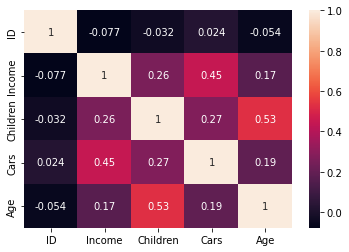

In [6]:
#Finding Correlation between data
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

##Label Encoding

In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Home Owner'] = label_encoder.fit_transform(df['Home Owner'])
df['Commute Distance'] = label_encoder.fit_transform(df['Commute Distance'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Purchased Bike'] = label_encoder.fit_transform(df['Purchased Bike'])
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1


In [8]:
df.dtypes

ID                  int64
Marital Status      int64
Gender              int64
Income              int64
Children            int64
Education           int64
Occupation          int64
Home Owner          int64
Cars                int64
Commute Distance    int64
Region              int64
Age                 int64
Purchased Bike      int64
dtype: object

In [9]:
df['Purchased Bike'].value_counts()

0    519
1    481
Name: Purchased Bike, dtype: int64

In [10]:
#Splitting into testing and training
X = df.drop(['Purchased Bike','ID'], axis=1)
y = df['Purchased Bike']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 999,stratify=y)

In [11]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  

##Logistic Regression

In [12]:
#Training the model
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression()
Model.fit(X_train, y_train)

LogisticRegression()

In [13]:
#Predicting the Model
Predict=Model.predict(X_test)

In [14]:
# Use score method to get accuracy of model

score_LogisticRegression = metrics.accuracy_score(y_test,Predict)
print(score_LogisticRegression)

0.6633333333333333


In [15]:
#Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, Predict)
print(cm)

[[114  42]
 [ 59  85]]


In [16]:
#Classification Report
cf_Logistic_reg=metrics.classification_report(y_test,Predict)
cf_Logistic_reg

'              precision    recall  f1-score   support\n\n           0       0.66      0.73      0.69       156\n           1       0.67      0.59      0.63       144\n\n    accuracy                           0.66       300\n   macro avg       0.66      0.66      0.66       300\nweighted avg       0.66      0.66      0.66       300\n'

##SVM

In [17]:
# Support vector classifier
from sklearn.svm import SVC  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [18]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [19]:
#Score
score_SVM = metrics.accuracy_score(y_test,y_pred)
score_SVM

0.7

In [20]:
#Confusion Matrix
cm= metrics.confusion_matrix(y_test, y_pred) 
cm

array([[118,  38],
       [ 52,  92]])

In [21]:
#Classification Report
cf_SVM=metrics.classification_report(y_test,Predict)
cf_SVM

'              precision    recall  f1-score   support\n\n           0       0.66      0.73      0.69       156\n           1       0.67      0.59      0.63       144\n\n    accuracy                           0.66       300\n   macro avg       0.66      0.66      0.66       300\nweighted avg       0.66      0.66      0.66       300\n'

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier(criterion='gini', random_state=5)  
Model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [23]:
#Predicting the test set result  
Predict= Model.predict(x_test)  

In [24]:
#Score
score_DT = metrics.accuracy_score(y_test,Predict)
score_DT

0.68

In [25]:
#Confusion Matrix
cm= metrics.confusion_matrix(y_test, Predict) 
cm

array([[117,  39],
       [ 57,  87]])

In [26]:
#Classification Report
cf_DT=metrics.classification_report(y_test,Predict)
cf_DT

'              precision    recall  f1-score   support\n\n           0       0.67      0.75      0.71       156\n           1       0.69      0.60      0.64       144\n\n    accuracy                           0.68       300\n   macro avg       0.68      0.68      0.68       300\nweighted avg       0.68      0.68      0.68       300\n'

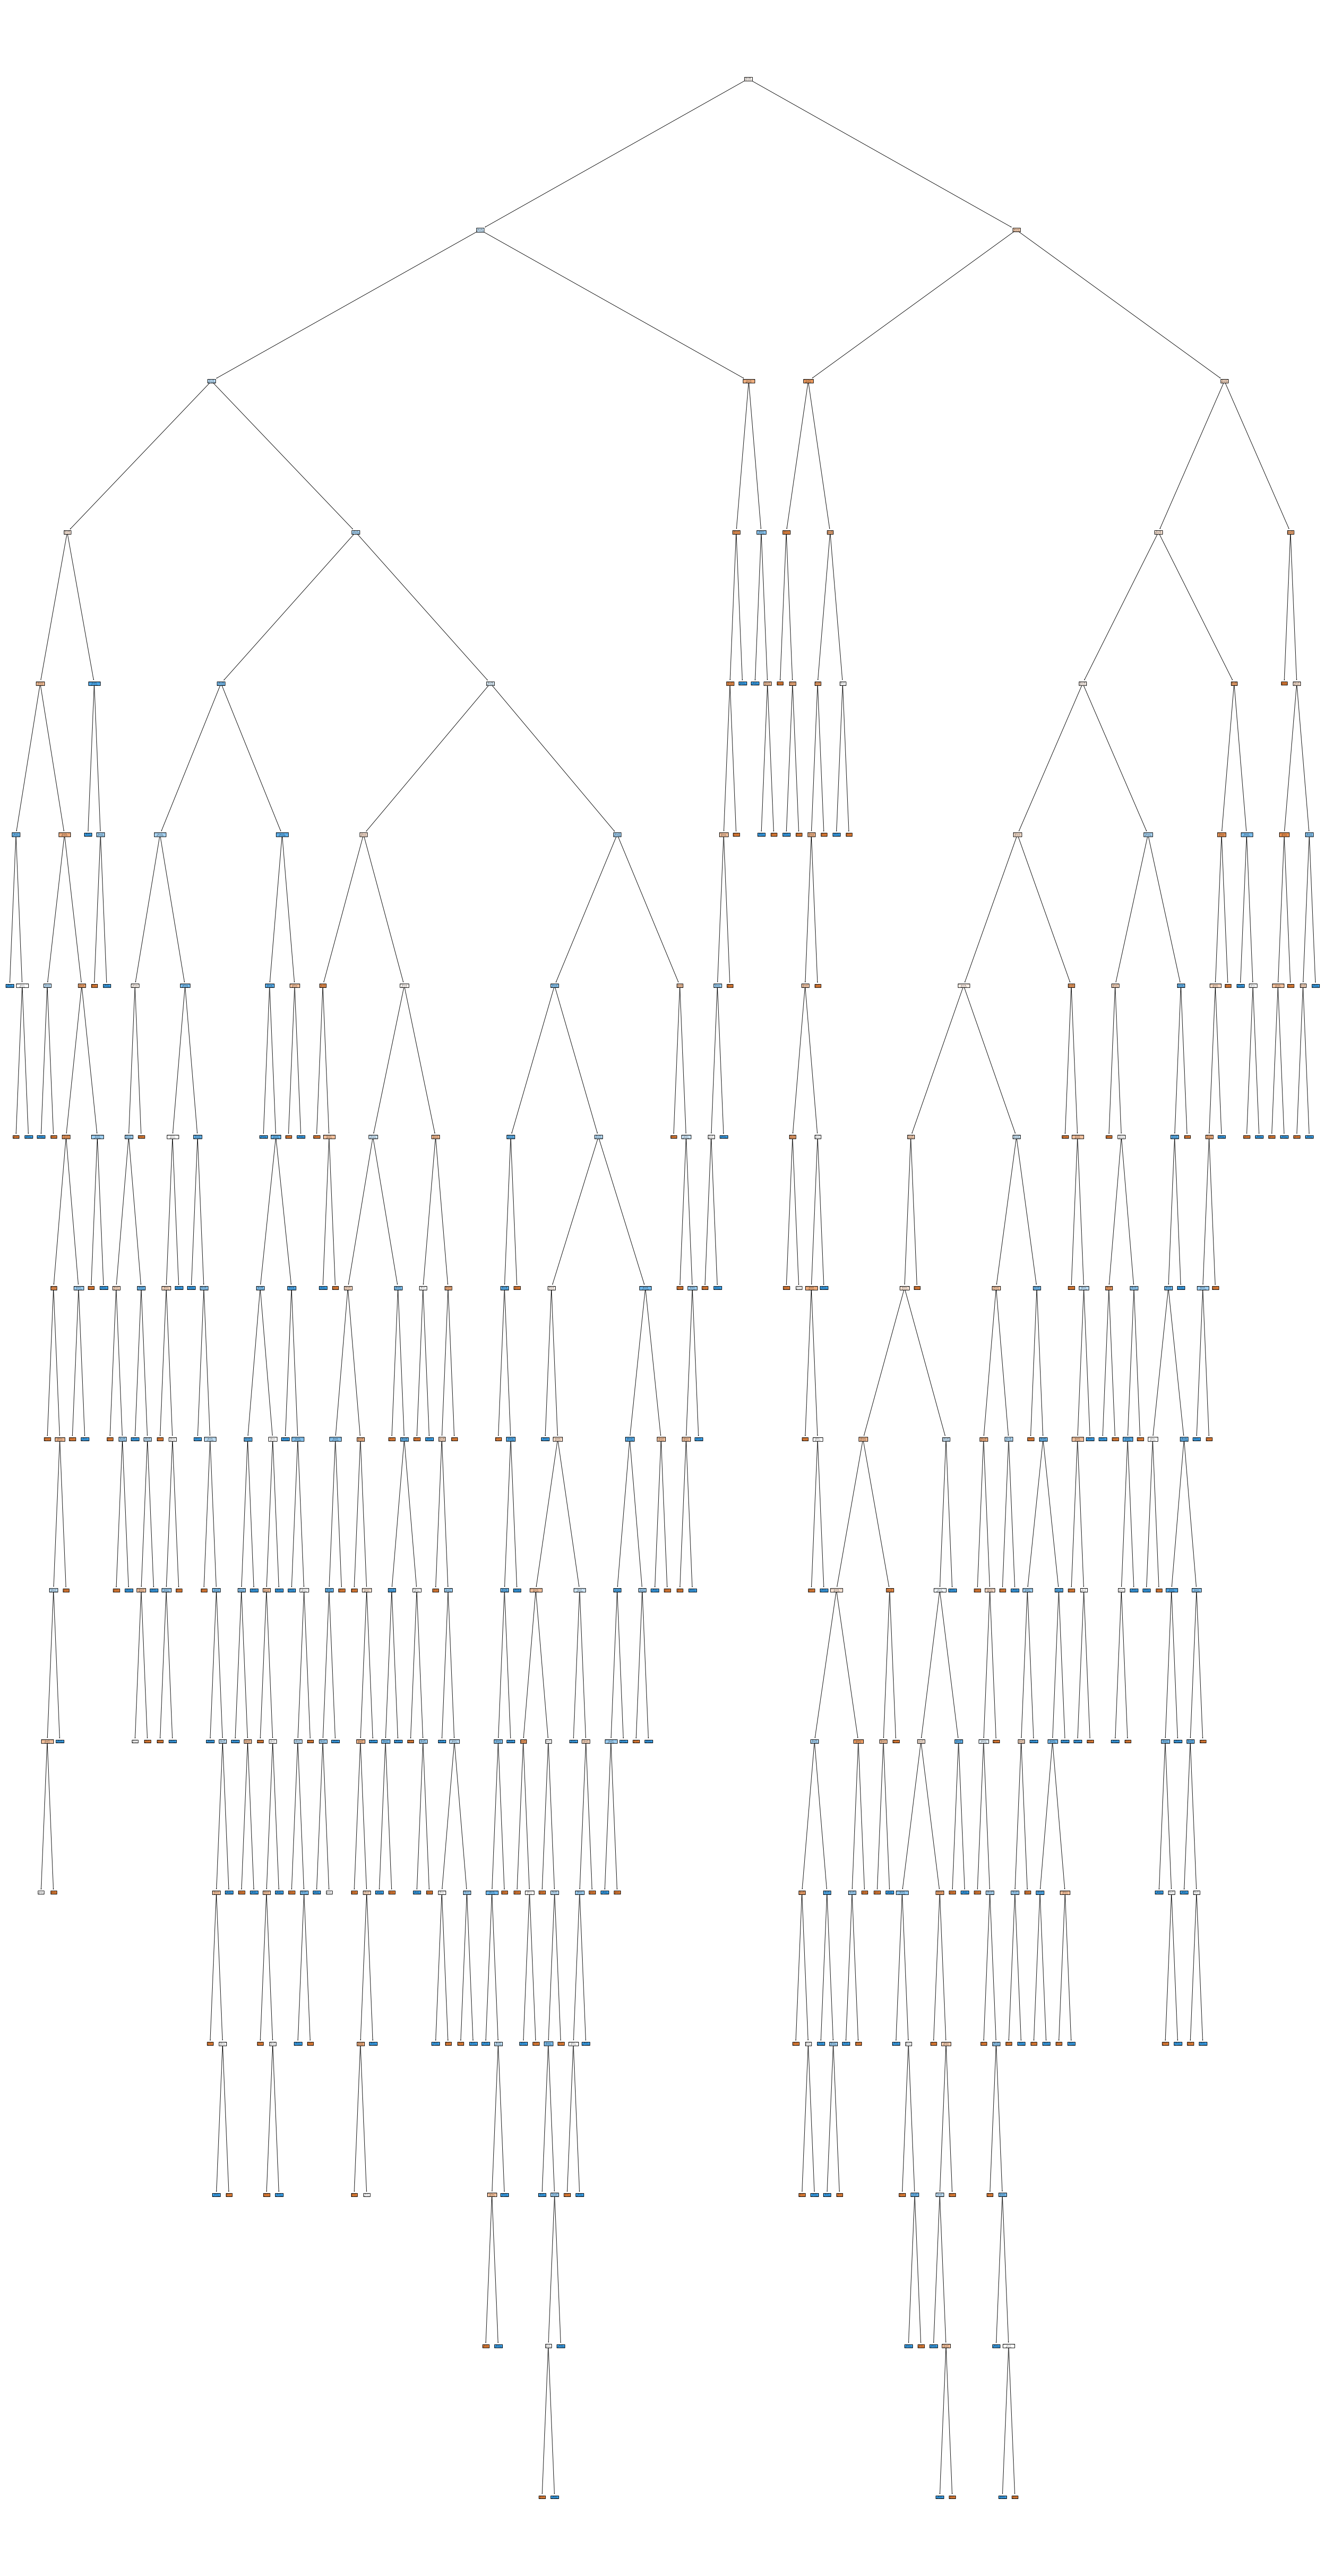

In [27]:
#Visualize DT
from sklearn import tree

fn=['Marital Status', 'Gender', 'Income', 'Children', 'Education','Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig =plt.figure(figsize=(50,100))
_ =tree.plot_tree(Model, feature_names = fn, class_names=cn, filled=True)

## Random Forest Classification

In [28]:
#Trainning the Model
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier()
Model.fit(x_train, y_train) 

RandomForestClassifier()

In [29]:
#Predicting the test set result  
Predict= Model.predict(x_test)  

In [30]:
#Score
score_RFC = metrics.accuracy_score(y_test,Predict)
score_RFC

0.7566666666666667

In [31]:
#Confusion Matrix
cm= metrics.confusion_matrix(y_test, Predict) 
cm

array([[126,  30],
       [ 43, 101]])

In [32]:
#Classification Report
cf_RFC=metrics.classification_report(y_test,Predict)
cf_RFC

'              precision    recall  f1-score   support\n\n           0       0.75      0.81      0.78       156\n           1       0.77      0.70      0.73       144\n\n    accuracy                           0.76       300\n   macro avg       0.76      0.75      0.75       300\nweighted avg       0.76      0.76      0.76       300\n'

##XGBoost Classifier

In [33]:
#Training and Testing the Model
from xgboost import XGBClassifier
Model = XGBClassifier()
Model.fit(x_train, y_train)
Predict = Model.predict(x_test)

In [34]:
#Score
score_RFC = metrics.accuracy_score(y_test,Predict)
score_RFC

0.7233333333333334

In [35]:
#Confusion Matrix
cm= metrics.confusion_matrix(y_test, Predict) 
cm

array([[119,  37],
       [ 46,  98]])

In [36]:
#Classification Report
cf_RFC=metrics.classification_report(y_test,Predict)
cf_RFC

'              precision    recall  f1-score   support\n\n           0       0.72      0.76      0.74       156\n           1       0.73      0.68      0.70       144\n\n    accuracy                           0.72       300\n   macro avg       0.72      0.72      0.72       300\nweighted avg       0.72      0.72      0.72       300\n'

##Accuracy of all model

In [37]:
print('Accuracy of Logistic Regression is:', score_LogisticRegression)
print('Accuracy of Support Vector Model is:', score_SVM)
print('Accuracy of Decsion Tree  is:', score_DT)
print('Accuracy of Random Forest Classifier is:', score_RFC)
print('Accuracy of XGBoost Classifier is:', score_LogisticRegression)

Accuracy of Logistic Regression is: 0.6633333333333333
Accuracy of Support Vector Model is: 0.7
Accuracy of Decsion Tree  is: 0.68
Accuracy of Random Forest Classifier is: 0.7233333333333334
Accuracy of XGBoost Classifier is: 0.6633333333333333
